In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [53]:
sns.set(style='whitegrid')
folder_path = 'C:/Users/Ismail/Desktop/Projects for GitHup/Sql/world_bank/sql_exports'
files = [
    "top10_gdp.csv",
    "bottom10_gdp.csv",
    "top10_growth.csv",
    "top10_inflation.csv",
    "top10_debt.csv",
    "rule_of_law_vs_growth.csv",
    "corruption_vs_growth.csv",
    "tax_vs_growth.csv",
    "military_vs_growth.csv",
    "health_vs_life_expectancy.csv",
    "missing_data_summary.csv"
]

In [54]:
data = {}
for file in files:
    path = os.path.join(folder_path,file)
    data[file.split('.')[0]] = pd.read_csv(path)

In [55]:
# Missing values 
for key, df in data.items():
    print(f'--- Missing Values in {key} ---')
    print(df.isna().sum().sort_values(ascending=False)*100)
    print('\n')

--- Missing Values in top10_gdp ---
country           0
year              0
GDP_current_US    0
dtype: int64


--- Missing Values in bottom10_gdp ---
GDP_current_US    1000
country              0
year                 0
dtype: int64


--- Missing Values in top10_growth ---
country       0
year          0
gdp_growth    0
dtype: int64


--- Missing Values in top10_inflation ---
country             0
year                0
inflation_annual    0
dtype: int64


--- Missing Values in top10_debt ---
country                   0
year                      0
central_goverment_debt    0
dtype: int64


--- Missing Values in rule_of_law_vs_growth ---
rule_of_law_estimate    1212500
gdp_growth               407900
country                       0
year                          0
dtype: int64


--- Missing Values in corruption_vs_growth ---
control_of_corruption_estimate    1221500
gdp_growth                         407900
country                                 0
year                                    0

In [56]:
def smart_imputation(df, country_col="country"):
    df_clean = df.copy()
    
    for col in df_clean.columns:
        if col in [country_col, "year"]:
            continue  
        
        missing_pct = df_clean[col].isnull().mean()
        
        # 100% Missing → Drop 
        if missing_pct == 1.0:
            print(f"Dropping {col} (100% Missing)")
            df_clean.drop(columns=[col], inplace=True)
            continue
        
        
        if np.issubdtype(df_clean[col].dtype, np.number):
            if missing_pct < 0.7:
                if country_col in df_clean.columns:
                    # Group Median per Country
                    df_clean[col] = df_clean.groupby(country_col)[col].transform(
                        lambda x: x.fillna(x.median())
                    )
                # country →global median
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
            else:
                print(f"⚠ {col}: High Missing ({missing_pct:.0%}), keep as NaN for analysis.")
        
        # Categorical
        else:
            df_clean[col].fillna("Unknown", inplace=True)
    
    return df_clean


for key, df in data.items():
    print(f"\nProcessing {key} ...")
    data[key] = smart_imputation(df)



Processing top10_gdp ...

Processing bottom10_gdp ...
Dropping GDP_current_US (100% Missing)

Processing top10_growth ...

Processing top10_inflation ...

Processing top10_debt ...

Processing rule_of_law_vs_growth ...
⚠ rule_of_law_estimate: High Missing (71%), keep as NaN for analysis.


C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Processing corruption_vs_growth ...
⚠ control_of_corruption_estimate: High Missing (72%), keep as NaN for analysis.

Processing tax_vs_growth ...


C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Processing military_vs_growth ...


C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Processing health_vs_life_expectancy ...

Processing missing_data_summary ...


C:\Users\Ismail\AppData\Local\Temp\ipykernel_22776\468237599.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [57]:
# Load the cleaned datasets
df_gdp = data["top10_gdp"].copy()
df_growth = data["top10_growth"].copy()
df_inflation = data["top10_inflation"].copy()
df_debt = data["top10_debt"].copy()
df_rule = data["rule_of_law_vs_growth"].copy()
df_corruption = data["corruption_vs_growth"].copy()
df_tax = data["tax_vs_growth"].copy()
df_health = data["health_vs_life_expectancy"].copy()
df_military = data["military_vs_growth"].copy()

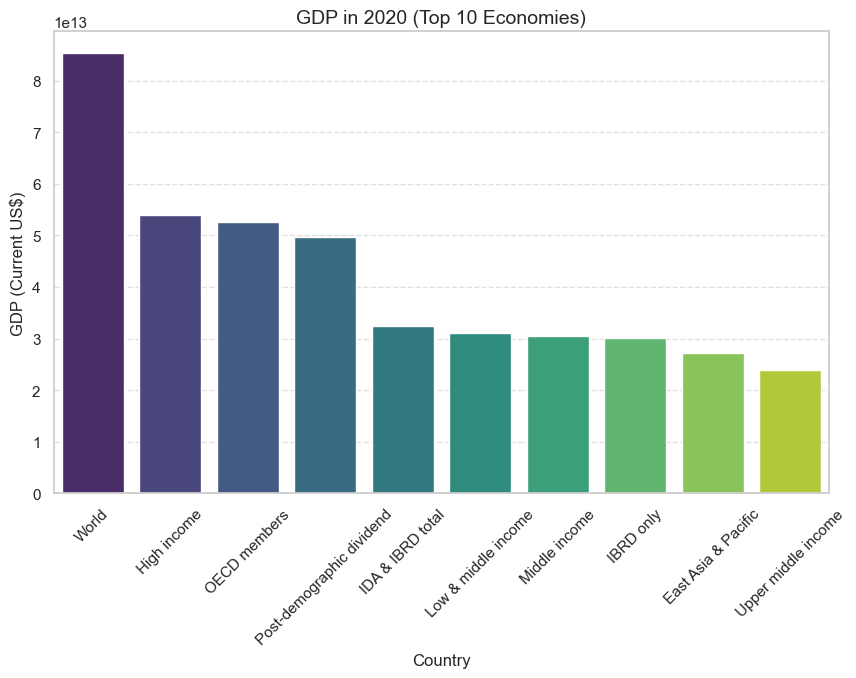

💡 Insight: Highest GDP in 2020: World
💡 Insight: Lowest GDP in 2020: Upper middle income



In [61]:
# 1. GDP Trends 
plt.figure(figsize=(10,6))
sns.barplot(data=df_gdp, x="country", y="GDP_current_US",hue='country', palette="viridis")
plt.title("GDP in 2020 (Top 10 Economies)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("GDP (Current US$)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig('GDP in 2020 (Top 10 Economies).png',bbox_inches='tight')
plt.show()

print("💡 Insight: Highest GDP in 2020:", df_gdp.loc[df_gdp["GDP_current_US"].idxmax()]["country"])
print("💡 Insight: Lowest GDP in 2020:", df_gdp.loc[df_gdp["GDP_current_US"].idxmin()]["country"])
print()

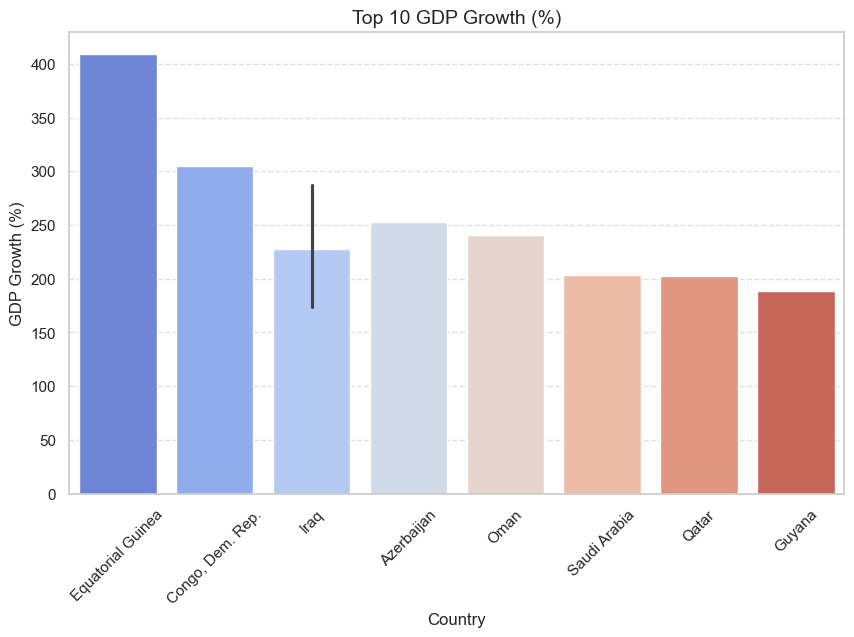

💡 Insight: Highest growth: Equatorial Guinea
💡 Insight: Lowest growth: Iraq



In [62]:
#  GDP Growth
plt.figure(figsize=(10,6))
sns.barplot(data=df_growth, x="country", y="gdp_growth",hue='country', palette="coolwarm")
plt.title("Top 10 GDP Growth (%)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("GDP Growth (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig('Top 10 GDP Growth (%).png',bbox_inches='tight')
plt.show()

print("💡 Insight: Highest growth:", df_growth.loc[df_growth["gdp_growth"].idxmax()]["country"])
print("💡 Insight: Lowest growth:", df_growth.loc[df_growth["gdp_growth"].idxmin()]["country"])
print()


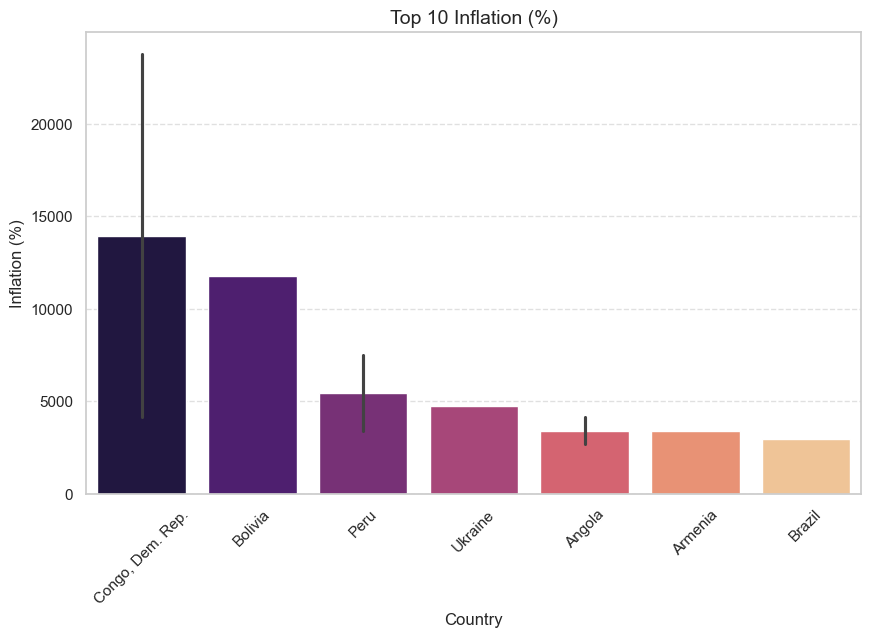

💡 Insight: Highest inflation: Congo, Dem. Rep.
💡 Insight: Lowest inflation: Angola



In [34]:
# Inflation

plt.figure(figsize=(10,6))
sns.barplot(data=df_inflation, x="country", y="inflation_annual",hue='country', palette="magma")
plt.title("Top 10 Inflation (%)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Inflation (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig('Military Expenditure vs GDP Growth (2020).png',bbox_inches='tight')
plt.show()

print("💡 Insight: Highest inflation:", df_inflation.loc[df_inflation["inflation_annual"].idxmax()]["country"])
print("💡 Insight: Lowest inflation:", df_inflation.loc[df_inflation["inflation_annual"].idxmin()]["country"])
print()

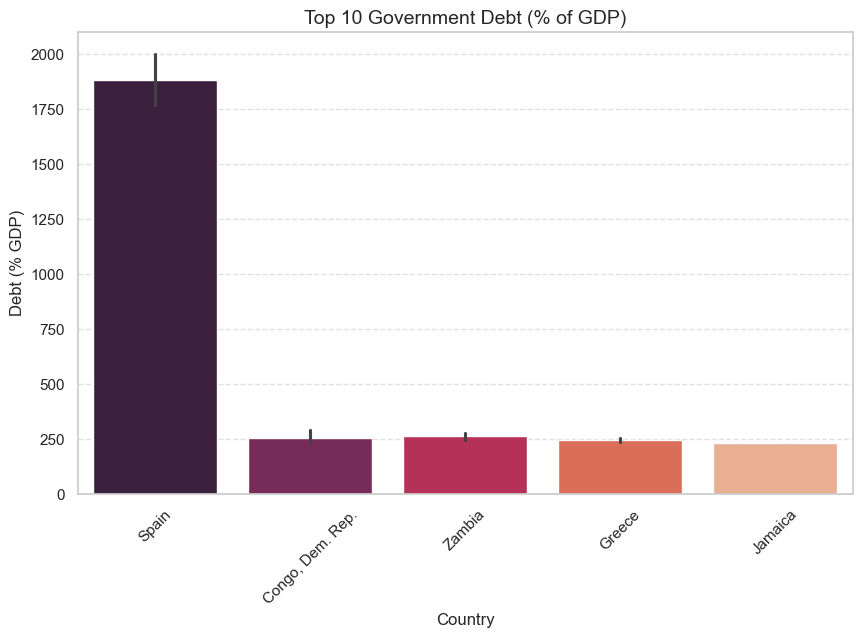

💡 Insight: Highest debt: Spain
💡 Insight: Lowest debt: Jamaica



In [63]:
# Government Debt

plt.figure(figsize=(10,6))
sns.barplot(data=df_debt, x="country", y="central_goverment_debt",hue='country', palette="rocket")
plt.title("Top 10 Government Debt (% of GDP)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Debt (% GDP)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig('Top 10 Government Debt (% of GDP).png',bbox_inches='tight')
plt.show()

print("💡 Insight: Highest debt:", df_debt.loc[df_debt["central_goverment_debt"].idxmax()]["country"])
print("💡 Insight: Lowest debt:", df_debt.loc[df_debt["central_goverment_debt"].idxmin()]["country"])
print()

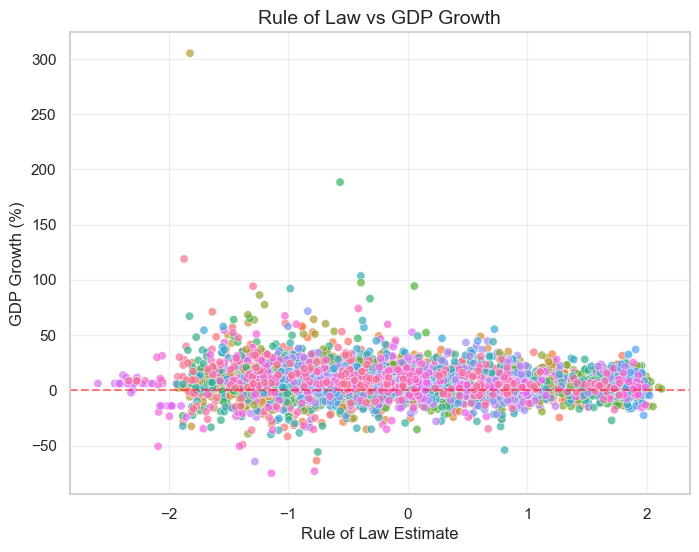

💡 Insight: Correlation between Rule of Law and GDP Growth: -0.11



In [64]:
# 5. Rule of Law vs GDP Growth (Scatter)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_rule, x="rule_of_law_estimate", y="gdp_growth", hue="country", alpha=0.7, legend=False)
plt.title("Rule of Law vs GDP Growth", fontsize=14)
plt.xlabel("Rule of Law Estimate")
plt.ylabel("GDP Growth (%)")
plt.axhline(0, color="red", linestyle="--", alpha=0.5)
plt.grid(alpha=0.3)
plt.savefig('Rule of Law vs GDP Growth.png',bbox_inches='tight')
plt.show()

corr_rule = df_rule[["rule_of_law_estimate", "gdp_growth"]].corr().iloc[0,1]
print(f"💡 Insight: Correlation between Rule of Law and GDP Growth: {corr_rule:.2f}\n")


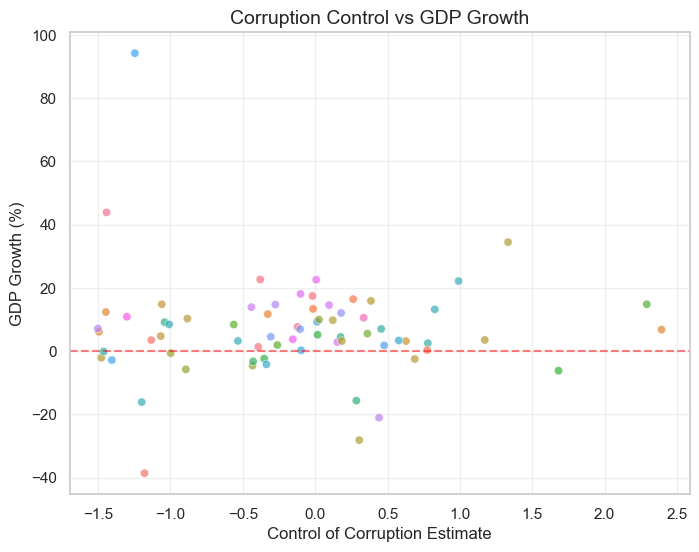

💡 Insight: Correlation between Corruption Control and GDP Growth: -0.03



In [65]:
# Corruption vs GDP Growth (Scatter)
df_corrupt2 = data["corruption_vs_growth"].sample(n=200, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corrupt2, x="control_of_corruption_estimate", y="gdp_growth", hue="country", alpha=0.7, legend=False)
plt.title("Corruption Control vs GDP Growth", fontsize=14)
plt.xlabel("Control of Corruption Estimate")
plt.ylabel("GDP Growth (%)")
plt.axhline(0, color="red", linestyle="--", alpha=0.5)
plt.grid(alpha=0.3)
plt.savefig('Corruption Control vs GDP Growth.png',bbox_inches='tight')
plt.show()

corr_corrupt = df_corrupt2[["control_of_corruption_estimate", "gdp_growth"]].corr().iloc[0,1]
print(f"💡 Insight: Correlation between Corruption Control and GDP Growth: {corr_corrupt:.2f}\n")

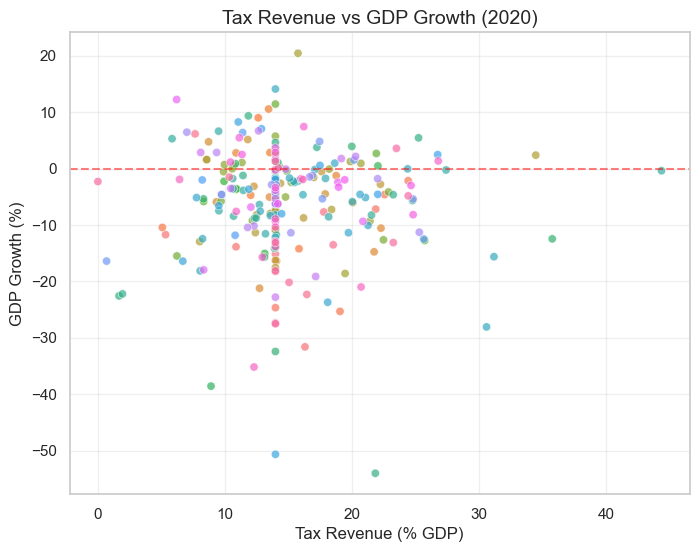

💡 Insight: Countries with highest tax revenue: Nauru
💡 Insight: Countries with lowest tax revenue: Somalia



In [66]:
# Tax Revenue vs GDP Growth (2020)
df_tax_2020 = df_tax[df_tax["year"]==2020]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tax_2020, x="tax_revenue", y="gdp_growth", hue="country", alpha=0.7, legend=False)
plt.title("Tax Revenue vs GDP Growth (2020)", fontsize=14)
plt.xlabel("Tax Revenue (% GDP)")
plt.ylabel("GDP Growth (%)")
plt.axhline(0, color="red", linestyle="--", alpha=0.5)
plt.savefig('Tax Revenue vs GDP Growth (2020).png',bbox_inches='tight')
plt.grid(alpha=0.3)

plt.show()

# Insight
print("💡 Insight: Countries with highest tax revenue:", df_tax_2020.loc[df_tax_2020["tax_revenue"].idxmax()]["country"])
print("💡 Insight: Countries with lowest tax revenue:", df_tax_2020.loc[df_tax_2020["tax_revenue"].idxmin()]["country"])
print()

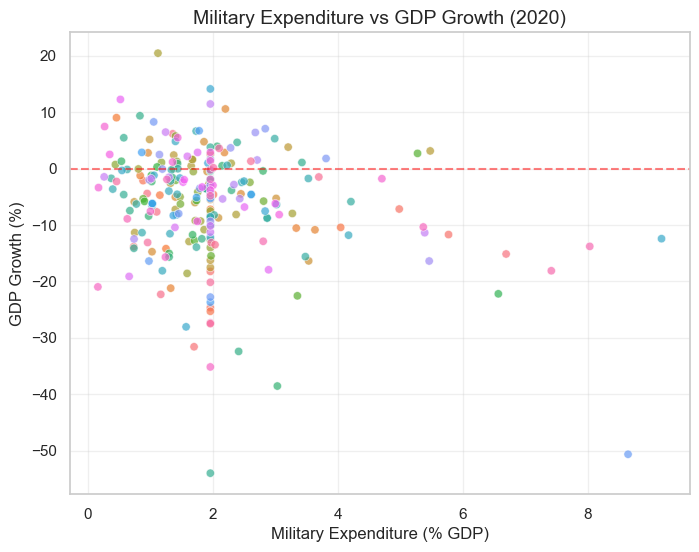

💡 Insight: Highest military spending: Saudi Arabia
💡 Insight: Lowest military spending: Mauritius



In [60]:
# Military Expenditure vs GDP Growth (2020)
df_military_2020 = df_military[df_military["year"]==2020]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_military_2020, x="military_expenditure", y="gdp_growth", hue="country", alpha=0.7, legend=False)
plt.title("Military Expenditure vs GDP Growth (2020)", fontsize=14)
plt.xlabel("Military Expenditure (% GDP)")
plt.ylabel("GDP Growth (%)")
plt.axhline(0, color="red", linestyle="--", alpha=0.5)
plt.grid(alpha=0.3)
plt.savefig('Military Expenditure vs GDP Growth (2020).png',bbox_inches='tight')
plt.show()

# Insight
print("💡 Insight: Highest military spending:", df_military_2020.loc[df_military_2020["military_expenditure"].idxmax()]["country"])
print("💡 Insight: Lowest military spending:", df_military_2020.loc[df_military_2020["military_expenditure"].idxmin()]["country"])
print()

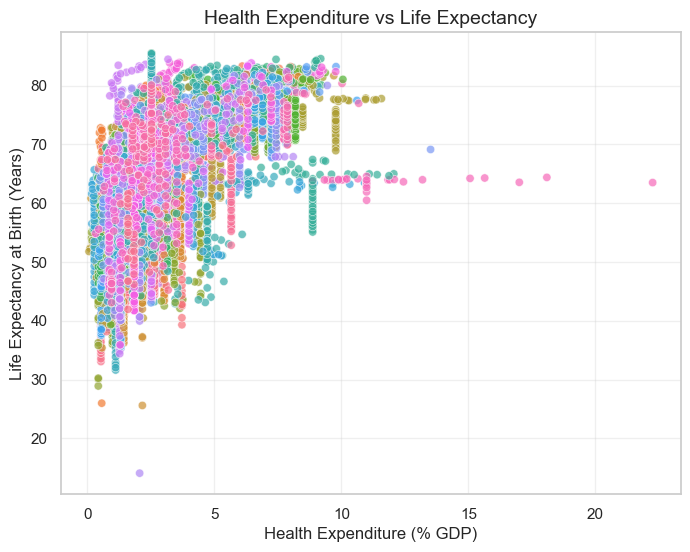

💡 Insight: Higher health expenditure tends to associate with higher life expectancy.



In [59]:
# Health Expenditure vs Life Expectancy

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_health, x="government_health_expenditure", y="life_expectancy_at_birth", hue="country", alpha=0.7, legend=False)
plt.title("Health Expenditure vs Life Expectancy", fontsize=14)
plt.xlabel("Health Expenditure (% GDP)")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.grid(alpha=0.3)
plt.savefig('Health Expenditure vs Life Expectancy.png',bbox_inches='tight')
plt.show()

print("💡 Insight: Higher health expenditure tends to associate with higher life expectancy.\n")

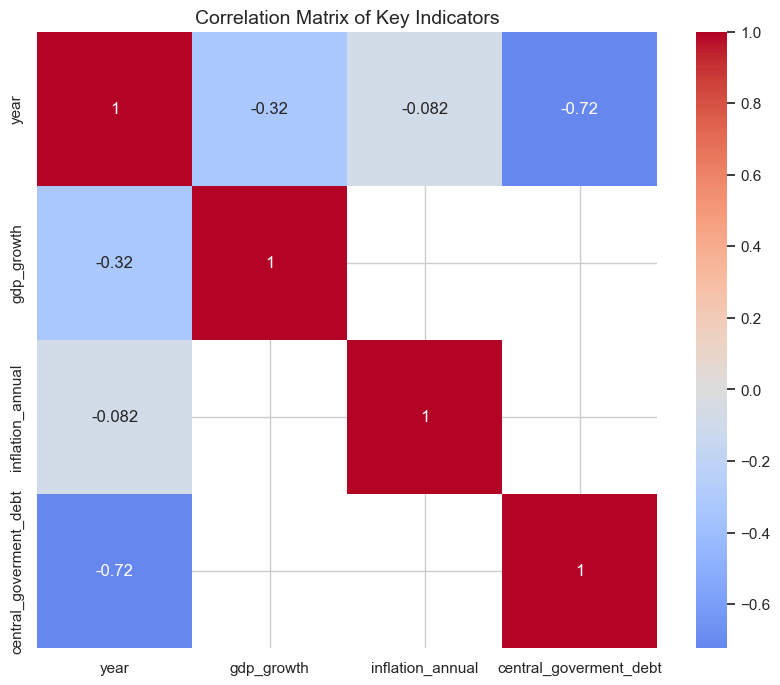

In [67]:
# Correlation Heatmap (Economy + Governance)
# Merge some indicators into one dataset
merged = df_growth.merge(df_inflation, on=["country","year"], how="outer")
merged = merged.merge(df_debt, on=["country","year"], how="outer")

plt.figure(figsize=(10,8))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Key Indicators", fontsize=14)
plt.savefig('Correlation Matrix of Key Indicators.png',bbox_inches='tight')
plt.show()